In [18]:
import cairo
from IPython.display import Image, display, SVG
from math import pi
from io import BytesIO
import math
import numpy as np

In [10]:
def disp(draw_func):
    x,y = 300,300
    svgio = BytesIO()
    with cairo.SVGSurface(svgio, x, y) as surface:
        context = cairo.Context(surface)
        draw_func(context, x, y)
    display(SVG(data=svgio.getvalue()))

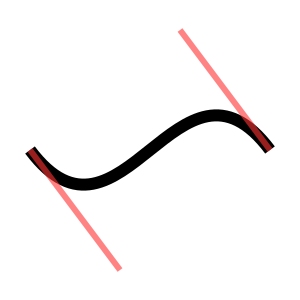

In [11]:
@disp
def sample(context, dimx, dimy):
    x, y, x1, y1 = 0.1, 0.5, 0.4, 0.9
    x2, y2, x3, y3 = 0.6, 0.1, 0.9, 0.5
    context.scale(dimx, dimy)
    context.set_line_width(0.04)
    context.move_to(x, y)
    context.curve_to(x1, y1, x2, y2, x3, y3)
    context.stroke()
    context.set_source_rgba(1, 0.2, 0.2, 0.6)
    context.set_line_width(0.02)
    context.move_to(x, y)
    context.line_to(x1, y1)
    context.move_to(x2, y2)
    context.line_to(x3, y3)
    context.stroke()


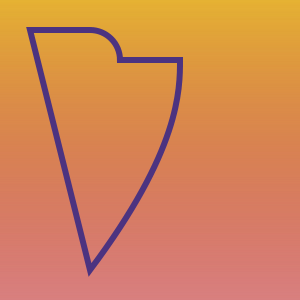

In [16]:
@disp
def sample2(ctx, x,y):
    ctx.scale(x, y)  # Normalizing the canvas

    pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
    pat.add_color_stop_rgba(1, 0.7, 0, 0, 0.5)  # First stop, 50% opacity
    pat.add_color_stop_rgba(0, 0.9, 0.7, 0.2, 1)  # Last stop, 100% opacity

    ctx.rectangle(0, 0, 1, 1)  # Rectangle(x0, y0, x1, y1)
    ctx.set_source(pat)
    ctx.fill()

    ctx.translate(0.1, 0.1)  # Changing the current transformation matrix

    ctx.move_to(0, 0)
    # Arc(cx, cy, radius, start_angle, stop_angle)
    ctx.arc(0.2, 0.1, 0.1, -math.pi / 2, 0)
    ctx.line_to(0.5, 0.1)  # Line to (x,y)
    # Curve(x1, y1, x2, y2, x3, y3)
    ctx.curve_to(0.5, 0.2, 0.5, 0.4, 0.2, 0.8)
    ctx.close_path()

    ctx.set_source_rgb(0.3, 0.2, 0.5)  # Solid color
    ctx.set_line_width(0.02)
    ctx.stroke()

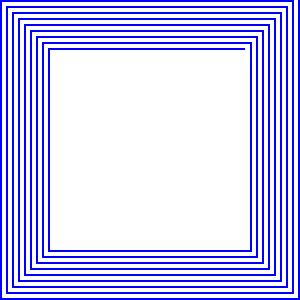

In [23]:
@disp
def draw_spiral (ctx, width, height):
    wd = .02 * width
    hd = .02 * height

    width -= 2
    height -= 2

    ctx.move_to (width + 1, 1-hd)
    for i in range(9):
        ctx.rel_line_to (0, height - hd * (2 * i - 1))
        ctx.rel_line_to (- (width - wd * (2 *i)), 0)
        ctx.rel_line_to (0, - (height - hd * (2*i)))
        ctx.rel_line_to (width - wd * (2 * i + 1), 0)

    ctx.set_source_rgb (0, 0, 1)
    ctx.stroke()

In [20]:
width, height = 255, 255
data = np.ndarray(shape=(height, width), dtype=np.uint32)
surface = cairo.ImageSurface.create_for_data(
data, cairo.FORMAT_ARGB32, width, height)

In [ ]:
svgio = BytesIO()
    with cairo.SVGSurface(svgio, x, y) as surface:
        context = cairo.Context(surface)
        draw_func(context, x, y)
    display(SVG(data=svgio.getvalue()))

In [24]:
import cairo
import numpy as np
from PIL import Image

# imdata is a 2D numpy array of dtype np.uint8 containing grayscale pixel intensities on [0, 255]
# repeat for each of R, G, B, and add a deck of 255s for alpha
cairo_imdata = np.dstack([imdata, imdata, imdata, np.ones_like(imdata)*255])
surface = cairo.ImageSurface.create_for_data(cairo_imdata, cairo.FORMAT_ARGB32, *(reversed(imdata.shape)))

# create a context and do some doodling
ctx = cairo.Context(surface)
ctx.set_source_rgb(1.0, 0.0, 0.0) # pure red
ctx.set_line_width(3)
# draw an arc centered at (10,10) with radius 5, from 0 to 2*pi radians
ctx.arc(10, 10, 5, 0, 2*np.pi)
ctx.stroke()

h, w = cairo_imdata.shape[:-1]
pil_image = Image.frombuffer("RGBA", (w, h), surface.get_data(), "raw", "BGRA", 0, 1)

# now you can do PIL things
pil_image.save("image.jpg")

NameError: name 'imdata' is not defined